# Estimation of freezing properties of mixtures

This notebook estimates the eutectic temperature of binary and ternary mixtures using the van't Hoff equation.

## Data

Enter the required thermodynamic properties in the cell below.

In [ ]:
# 1,1,1,2,3,3-hexafluoropropane
MA = 152.04      # g mol^{-1}
TA = 127.0       # K   
HA = 7.55e3      # J mol^{-1}
densA = 1.589e3  # kg m^{-3}


# difluoromethane
MB = 52.023    # g mol^{-1}
TB = 136.8     # K
HB = 4.38e3    # J mol^{-1}
densB = 1.395e3  # kg m^{-3}


# trifluoromethane
MC = 70.014    # g mol^{-1}
TC = 115.8     # K
HC = 4.06e3    # J mol^{-1}
densC = 1.690e3  # kg m^{-3}

## Binary mixtures with component $A$

eutectic A B: 115.83 K, xA=0.502
eutectic A C: 107.59 K, xA=0.275


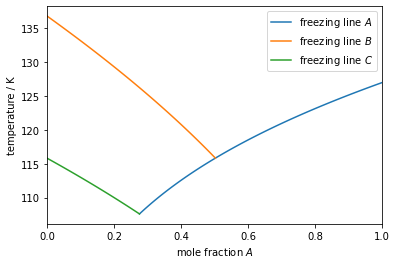

In [ ]:
import numpy as np
import pylab as plt
from scipy.optimize import fsolve

def G(T, T0, H0):
    x = T0/T - 1.0
    slope = H0/(R*T0)
    return slope*x

def res(T, TA, HA, TB, HB):
    xA = np.exp(-G(T, TA, HA))
    xB = np.exp(-G(T, TB, HB))
    return xA + xB - 1.0

R = 8.314




sol = fsolve(res, TA, args=(TA, HA, TB, HB))
TminAB = sol[0]
xminAB = np.exp(-G(TminAB, TA, HA))
print(f'eutectic A B: {TminAB:.2f} K, xA={xminAB:.3f}')

sol = fsolve(res, TA, args=(TA, HA, TC, HC))
TminAC = sol[0]
xminAC = np.exp(-G(TminAC, TA, HA))
print(f'eutectic A C: {TminAC:.2f} K, xA={xminAC:.3f}')

Tmax = max(TA, TB, TC)
Tmin = min(TminAB, TminAC)
wmin = xmin*MA/(xmin*MA+(1.0-xmin)*MB)
#print(f'{wmin}, {Tmin} K')

T_list = np.linspace(Tmin, Tmax, 100)
x_list = [np.exp(-G(T, TA, HA)) for T in T_list]
w_list = [x*MA/(x*MA+(1.0-x)*MB) for x in x_list]
plt.plot(x_list, T_list, label=r'freezing line $A$')


T_list = np.linspace(TminAB, Tmax, 100)
x_list = [1.0-np.exp(-G(T, TB, HB)) for T in T_list]
w_list = [x*MA/(x*MA+(1.0-x)*MB) for x in x_list]
plt.plot(x_list, T_list, label=r'freezing line $B$')

T_list = np.linspace(TminAC, Tmax, 100)
x_list = [1.0-np.exp(-G(T, TC, HC)) for T in T_list]
w_list = [x*MA/(x*MA+(1.0-x)*MC) for x in x_list]
plt.plot(x_list, T_list, label=r'freezing line $C$')

plt.xlim([0.0, 1.0])
plt.xlabel(r'mole fraction $A$')
plt.ylabel(r'temperature / K')
plt.legend()
plt.show()


## Ternary mixture

This estimates the eutectic point and its associated properties.

In [ ]:
import numpy as np
import pylab as plt
from scipy.optimize import fsolve


def res3(T):
    xA = np.exp(-G(T, TA, HA))
    xB = np.exp(-G(T, TB, HB))
    xC = np.exp(-G(T, TC, HC))
    return xA + xB + xC - 1.0

sol = fsolve(res3, TA)
T_eutectic = sol[0]
print(f'eutectic temperature: {T_eutectic:.2f} K')


xA = np.exp(-G(T_eutectic, TA, HA))
xB = np.exp(-G(T_eutectic, TB, HB))
xC = np.exp(-G(T_eutectic, TC, HC))
H = xA*HA+xB*HB+xC*HC
M = MA*xA + MB*xB + MC*xC
M *= 1.0e-3
VA = MA/densA * 1.0e-3
VB = MB/densB * 1.0e-3
VC = MC/densC * 1.0e-3
V = xA*VA + xB*VB + xC*VC
dens = M/V
print(f'eutectic composition: {xA:.3f}  {xB:.3f}  {xC:.3f}')
print(f'latent heat: {H*1.0e-3:.2f}' + r' kJ mol^{-1}')
print(f'{dens:.2f} kg mol^{{-1}}')
print(f'energy density: {H/V*1.0e-6:.1f} MJ m^{{-1}}')

eutectic temperature: 101.87 K
eutectic composition: 0.171  0.267  0.562
latent heat: 4.74 kJ mol^{-1}
1597.44 kg mol^{-1}
energy density: 95.6 MJ m^{-1}
